In [0]:
%tensorflow_version 1.x

In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization


Using TensorFlow backend.


In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [6]:
xtrain.shape

(60000, 28, 28)

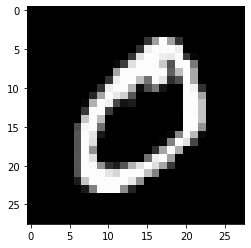

In [7]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [8]:
ytrain[1]

0

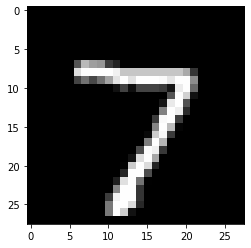

In [9]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [10]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [11]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [13]:
x_test.shape

(10000, 784)

In [0]:
x_train/=255
x_test/=255

In [0]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [0]:
# Initialize the constructor

model = Sequential()

In [0]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
epochs=10
batch_size = 20000
 

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=3, verbose=True)
loss,accuracy = model.evaluate(x_test,y_test,verbose=False)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4091 - acc: 0.8797
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3868 - acc: 0.8785
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2636 - acc: 0.9209
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2833 - acc: 0.9118
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2330 - acc: 0.9305
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2281 - acc: 0.9338
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2159 - acc: 0.9387
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1954 - acc: 0.9440
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1954 - acc: 0.9422
Epoch 10/10
60000/60000 [==============================] - 

In [20]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.931
Loss: 0.241


In [0]:
y_predict = model.predict(x_test)

In [22]:
y_predict[0]

array([7.3041947e-06, 8.4089891e-09, 1.3506114e-05, 1.6459575e-04,
       3.1855100e-07, 5.5410005e-06, 8.1936493e-09, 9.9950886e-01,
       5.2427331e-06, 2.9471706e-04], dtype=float32)

In [23]:
np.argmax(y_predict[0])

7

In [36]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 962    0    2    1    0    3    6    3    3    0]
 [   0 1120    3    1    0    1    3    1    6    0]
 [   7    1  972    9    5    0    5   11   20    2]
 [   0    1   10  956    0   13    1   11   14    4]
 [   1    1    9    0  930    0    7    3    5   26]
 [   5    1    0   22    1  835    8    4   13    3]
 [   7    3    2    0    7   15  919    2    3    0]
 [   0    8   22    2    3    1    0  970    2   20]
 [   3    3    7   16    7   10    9   11  904    4]
 [   6    6    2   14   19    1    1   22    7  931]]


In [26]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.92      0.92      1032
           3       0.91      0.92      0.92      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.92      0.91       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.91      0.89      0.90       974
           9       0.92      0.89      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

